In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 

# 1.Get the data

In [159]:
df = pd.read_csv('E:/ML_Datasets/IRIS.csv')

In [160]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [161]:
# Encode the data
# categorical data converted into numerical data

In [162]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

df['species']=label.fit_transform(df['species'])
#q['species']=label.fit_transform(q['species'])
#data = pd.get_dummies(df,columns=['species'])
#data

In [163]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [164]:
# data divide into dependent and independent variable
x=pd.DataFrame(df.iloc[:,:4])
y=pd.DataFrame(df.iloc[:,-1])

In [165]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [166]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [167]:
# standerdise the data

In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)

In [169]:
x_scaled=pd.DataFrame(x_scaled,columns=data.columns[:4])

In [170]:
x_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [171]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


# 2. pair plot

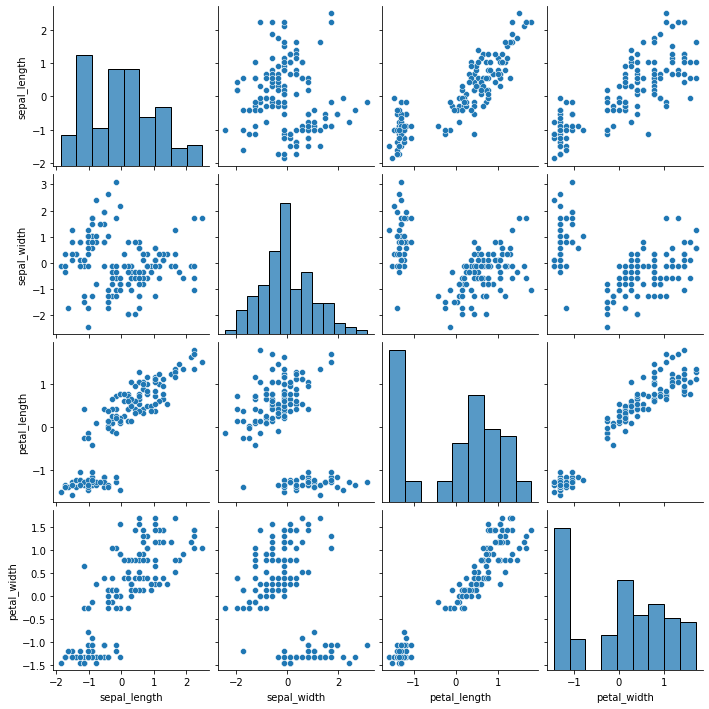

In [172]:
sns.pairplot(x_scaled)

# 3.Train_test_split

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25)

# 4.Using KNN

In [174]:
from sklearn.neighbors import KNeighborsClassifier

In [175]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [176]:
knn.fit(x_train,y_train)

C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [177]:
y_predict = knn.predict(x_test)

# 4.prediction and evealuation

In [182]:
print(confusion_matrix(y_test,y_predict))

[[16  0  0]
 [ 0  9  2]
 [ 0  0 11]]


In [181]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.82      0.90        11
           2       0.85      1.00      0.92        11

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.96      0.95      0.95        38



# choose value of k

In [213]:
accuracy_rate=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x_scaled,df['species'],cv=4)
    #print(score)
    accuracy_rate.append(score.mean())
    
    

    

Text(0.5, 1.0, 'k vs accuracy_rate')

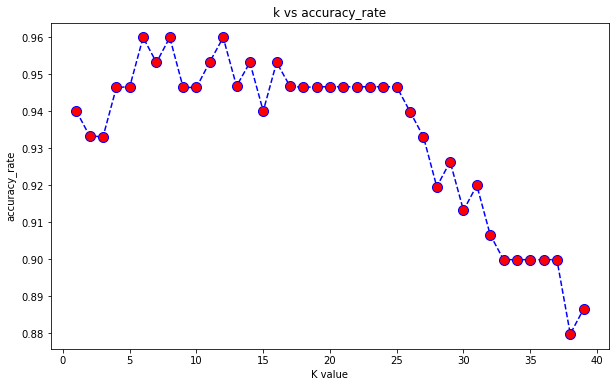

In [217]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('K value')
plt.ylabel('accuracy_rate')
plt.title('k vs accuracy_rate')
#plt.show()

In [219]:
error_rate=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,x_scaled,df['species'],cv=4)
    error_rate.append(1-(score.mean()))
    

Text(0.5, 1.0, 'k vs error_rate')

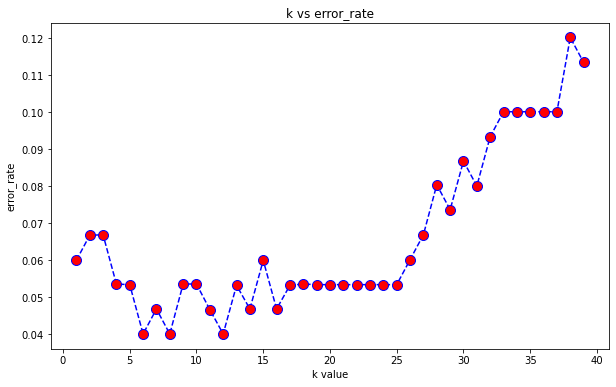

In [220]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('k value')
plt.ylabel('error_rate')
plt.title('k vs error_rate')

In [226]:
# if k =38
knn=KNeighborsClassifier(n_neighbors=38)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('*********')
print(classification_report(y_test,y_pred))

[[16  0  0]
 [ 0 11  0]
 [ 0  2  9]]
*********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.96      0.95      0.95        38



C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [230]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print('**********')
print(classification_report(y_test,y_pred))

[[16  0  0]
 [ 0 11  0]
 [ 0  2  9]]
**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      1.00      0.92        11
           2       1.00      0.82      0.90        11

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.96      0.95      0.95        38



C:\Users\Pritam\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
